In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [2]:
# More imports
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
# yes, you can read dataframes from URLs!
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')

In [4]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [5]:
df.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


In [36]:
# Start by doing the WRONG thing - trying to predict the price itself
series = df['close'].values.reshape(-1, 1)

In [38]:
# Normalize the data
# Note: I didn't think about where the true boundary is, this is just approx.
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

ValueError: Expected 2D array, got 1D array instead:
array=[-1.62500489e+00 -1.64174953e+00 -1.63301320e+00 -1.66431839e+00
 -1.68470317e+00 -1.77279453e+00 -1.76478623e+00 -1.84778139e+00
 -1.84486928e+00 -1.78517101e+00 -1.85506167e+00 -1.84996548e+00
 -1.75604989e+00 -1.73566512e+00 -1.73420906e+00 -1.67378275e+00
 -1.61481250e+00 -1.57185886e+00 -1.48813567e+00 -1.45755850e+00
 -1.46192667e+00 -1.48595159e+00 -1.46374674e+00 -1.52963325e+00
 -1.53108931e+00 -1.58423534e+00 -1.59151561e+00 -1.54783395e+00
 -1.57549900e+00 -1.55147409e+00 -1.60170800e+00 -1.57549900e+00
 -1.58569139e+00 -1.58277928e+00 -1.58860350e+00 -1.48740764e+00
 -1.52817720e+00 -1.49832806e+00 -1.52089692e+00 -1.49760003e+00
 -1.54929000e+00 -1.52089692e+00 -1.46447477e+00 -1.42698133e+00
 -1.52744917e+00 -1.46556681e+00 -1.49395989e+00 -1.52672114e+00
 -1.47685124e+00 -1.45974259e+00 -1.40514050e+00 -1.37310728e+00
 -1.32432942e+00 -1.36073081e+00 -1.31850519e+00 -1.29957647e+00
 -1.35053842e+00 -1.33306575e+00 -1.22458961e+00 -1.18017992e+00
 -1.20129272e+00 -1.18527611e+00 -1.18891625e+00 -1.13526060e+00
 -1.15542697e+00 -1.10446503e+00 -1.06442350e+00 -1.10228094e+00
 -1.06005533e+00 -1.08189616e+00 -1.05131900e+00 -1.05859928e+00
 -1.10446503e+00 -1.11611347e+00 -1.05059097e+00 -1.09645672e+00
 -1.10810517e+00 -1.13213008e+00 -1.10883319e+00 -1.11829755e+00
 -1.19037230e+00 -1.14086642e+00 -9.93804803e-01 -9.15905830e-01
 -9.66139747e-01 -1.03675844e+00 -9.26098219e-01 -9.53035247e-01
 -9.21730052e-01 -8.44195093e-01 -8.94064996e-01 -9.80700303e-01
 -1.01928578e+00 -1.06879166e+00 -1.01564564e+00 -9.38474691e-01
 -9.46482997e-01 -9.59587497e-01 -9.06441469e-01 -8.66399940e-01
 -8.29270523e-01 -7.98693356e-01 -7.57195773e-01 -7.68844217e-01
 -7.71028301e-01 -6.80752855e-01 -6.53087799e-01 -6.57455966e-01
 -6.67648355e-01 -7.63748023e-01 -7.43363245e-01 -7.20794383e-01
 -7.04049744e-01 -8.03061523e-01 -8.79504441e-01 -7.65932106e-01
 -3.88085686e-01 -4.54336214e-01 -4.92193659e-01 -5.38860240e-01
 -3.79349352e-01 -3.24747268e-01 -3.43675991e-01 -4.28855242e-01
 -4.73264936e-01 -4.18662853e-01 -4.28855242e-01 -4.19390880e-01
 -4.40503686e-01 -4.98017881e-01 -5.78828965e-01 -5.81013049e-01
 -6.11590216e-01 -5.84653188e-01 -5.80794640e-01 -4.94377742e-01
 -4.89281548e-01 -4.95833798e-01 -6.21054577e-01 -5.62812354e-01
 -5.46795743e-01 -5.94845577e-01 -5.16218576e-01 -4.76905075e-01
 -4.83457325e-01 -5.18402659e-01 -4.55064242e-01 -3.25839310e-01
 -2.40296045e-01 -2.19911267e-01 -2.27191545e-01 -2.51216462e-01
 -1.92974239e-01 -9.90586550e-02 -1.70405378e-01 -1.87150017e-01
 -2.42480129e-01 -1.55844822e-01 -1.71133406e-01 -1.09979072e-01
 -9.90586550e-02 -1.25267655e-01 -1.11435127e-01 -1.09251044e-01
 -1.32547933e-01 -9.39624605e-02 -1.33203158e-01 -2.30103656e-01
 -2.49760406e-01 -1.14347238e-01 -6.33852935e-02 -4.30005155e-02
 -1.44196378e-01 -4.73686822e-02  3.22924884e-03  4.50908465e-02
  5.60112633e-02  1.60847264e-01  9.89649026e-02  2.61621241e-02
  9.24126525e-02  1.40917938e-03  6.76597078e-02  1.55751070e-01
  1.71767681e-01  1.22261792e-01  1.22261792e-01  2.40202293e-01
  1.77591903e-01  2.76181796e-02  1.82688098e-01  1.67399514e-01
  1.40098472e-01  2.01689623e-01  1.78319931e-01  1.81960070e-01
  1.34638264e-01  8.95005414e-02  7.27559023e-02  2.06713015e-01
  1.93608515e-01  1.47014736e-01  2.05256959e-01  2.13265265e-01
  2.01616820e-01  1.73223737e-01  1.35366292e-01  5.89233744e-02
  7.49399857e-02  9.09565969e-02  7.56680135e-02 -9.54185160e-02
 -1.66765239e-01 -1.60941017e-01 -1.70405378e-01 -1.62397072e-01
 -1.89334100e-01 -7.35776825e-02 -1.12163155e-01 -7.50337381e-02
 -2.69839042e-02 -8.78320961e-03  1.37856517e-02 -8.78320961e-03
 -1.02392652e-02 -2.18877097e-02 -1.10707100e-01 -1.26723711e-01
 -1.83509878e-01 -1.07794988e-01 -4.80967100e-02 -7.94019048e-02
 -7.43057103e-02 -2.59952795e-01 -2.35199851e-01 -1.82053822e-01
 -2.47576323e-01 -2.75969407e-01 -3.66972880e-01 -3.70613019e-01
 -3.85901602e-01 -2.70145184e-01 -3.26203324e-01 -3.49500213e-01
 -5.19130687e-01 -4.93649714e-01 -5.51163909e-01 -7.07689883e-01
 -5.85381215e-01 -5.97029660e-01 -4.60888464e-01 -3.38943810e-01
 -2.83249685e-01 -3.05090518e-01 -3.48044157e-01 -2.91257990e-01
 -2.66505046e-01 -3.43675991e-01 -3.90997797e-01 -3.74253158e-01
 -4.46327908e-01 -4.46327908e-01 -5.92661493e-01 -5.03114076e-01
 -4.73264936e-01 -5.62812354e-01 -5.98485716e-01 -5.11850409e-01
 -5.38059409e-01 -4.36863547e-01 -4.09198491e-01 -3.73525130e-01
 -2.66505046e-01 -2.22823378e-01 -3.10186713e-01 -3.21835157e-01
 -3.28387407e-01 -2.97810240e-01 -2.02438600e-01 -1.26359697e-01
 -1.44196378e-01 -2.12630989e-01 -2.97082213e-01 -3.74981186e-01
 -3.85173575e-01 -3.63332741e-01 -3.86629630e-01 -3.40763880e-01
 -3.65516824e-01 -4.07742436e-01 -5.19858715e-01 -6.01397827e-01
 -5.24954909e-01 -4.52152131e-01 -6.16686410e-01 -7.25162550e-01
 -6.82936939e-01 -7.13514106e-01 -5.75188826e-01 -6.21782605e-01
 -5.97757688e-01 -5.49052629e-01 -6.04309938e-01 -5.53347993e-01
 -5.27138993e-01 -5.64996437e-01 -5.86109243e-01 -5.87565299e-01
 -5.51163909e-01 -5.89021354e-01 -5.65724465e-01 -6.63280188e-01
 -6.51631744e-01 -6.63280188e-01 -6.11590216e-01 -5.48979826e-01
 -5.48251798e-01 -6.20326549e-01 -6.43623438e-01 -5.64268410e-01
 -5.58444187e-01 -6.15958382e-01 -6.03581910e-01 -5.30779132e-01
 -4.88553520e-01 -3.66244852e-01 -3.94637936e-01 -4.06286380e-01
 -3.96822019e-01 -3.52412324e-01 -3.28387407e-01 -2.92714046e-01
 -2.89073907e-01 -2.44664212e-01 -2.55584629e-01 -2.97810240e-01
 -2.83249685e-01 -3.44404019e-01 -2.91257990e-01 -2.62136879e-01
 -2.46120268e-01 -2.27919573e-01 -1.06338933e-01 -1.52204683e-01
 -1.42740322e-01 -9.17783771e-02 -4.15444599e-02 -4.59126267e-02
 -5.46489601e-02 -9.54185160e-02 -4.44565711e-02 -3.64482654e-02
  2.68901519e-02 -4.68761928e-05 -9.51123740e-03  5.52832355e-02
  1.16015684e-02 -6.59912626e-03 -9.51123740e-03  1.45136795e-02
  2.86523495e-03 -1.05610905e-01 -5.46489601e-02 -7.86738770e-02
  3.59326273e-03  3.27143741e-02  1.28086014e-01  3.59326273e-03
 -2.40717931e-02 -2.95898733e-03  1.52417073e-02 -7.35776825e-02
 -1.24539627e-01 -8.44980993e-02 -1.38372155e-01 -1.13619211e-01
 -1.44196378e-01 -7.79458492e-02 -5.97451546e-02 -6.33852935e-02
 -1.05610905e-01 -1.50748628e-01 -1.29635822e-01 -8.01299326e-02
 -4.15444599e-02 -4.80967100e-02 -8.88662660e-02 -1.02698794e-01
 -5.24648767e-02 -6.55693769e-02 -5.61050156e-02 -6.41133213e-02
 -6.41133213e-02 -8.81382382e-02 -1.38372155e-01 -1.11435127e-01
 -5.39209323e-02 -7.43057103e-02 -1.14347238e-01 -1.07794988e-01
 -1.87150017e-01 -2.34471823e-01 -2.74513351e-01 -2.62136879e-01
 -2.43936184e-01 -2.15543101e-01 -1.90790156e-01 -2.97810240e-01
 -3.44768032e-01 -2.45392240e-01 -3.32755574e-01 -2.56312657e-01
 -2.49032379e-01 -2.35199851e-01 -2.97082213e-01 -3.08730657e-01
 -2.03894656e-01 -2.58132726e-01 -3.37851768e-01 -2.49760406e-01
 -3.06546574e-01 -3.08002629e-01 -4.73264936e-01 -4.33223408e-01
 -4.59432409e-01 -4.40503686e-01 -3.74981186e-01 -2.90529962e-01
 -3.15282907e-01 -2.97810240e-01 -2.80337573e-01 -2.09718878e-01
 -1.98070434e-01 -1.19443433e-01 -1.56572850e-01 -9.97866827e-02
 -2.27919573e-01 -1.88606073e-01 -1.44196378e-01 -1.47836517e-01
 -9.03223215e-02 -6.55693769e-02 -7.57617658e-02 -6.99375436e-02
 -6.12012101e-02 -5.82890990e-02 -4.15444599e-02 -6.26572657e-02
 -8.15859881e-02 -6.33852935e-02 -3.57202377e-02  7.78520968e-02
  1.33182208e-01  1.10613347e-01  7.34839301e-02  1.83416126e-01
  1.57207125e-01  1.22261792e-01  1.29542070e-01  1.90696403e-01
  3.55230683e-01  3.71975322e-01  3.15917183e-01  2.88980154e-01
  3.22469433e-01  3.31933794e-01  1.60119237e-01  3.19863464e-02
  1.26993972e-01  9.75088470e-02  5.45552077e-02  1.34638264e-01
  1.99432737e-01  1.87784292e-01  2.28553848e-01  2.68595377e-01
  2.25641737e-01  2.44570460e-01  2.00160765e-01  8.65884302e-02
  3.92666242e-02  1.81232042e-01  2.76603682e-01  8.00361802e-02
  1.12069403e-01  1.58663181e-01  1.25901931e-01  6.47475967e-02
  1.39734459e-01  1.84508167e-01  1.89240348e-01  2.94804377e-01
  6.93763603e-01  6.86483325e-01  7.02499936e-01  6.46077783e-01
  7.54189909e-01  6.43529686e-01  6.77018964e-01  7.13420353e-01
  7.28708937e-01  7.97143548e-01  7.50549770e-01  7.37445270e-01
  9.09259827e-01  8.80866744e-01  9.56217620e-01  9.38380939e-01
  9.71142189e-01  1.04176088e+00  1.05413736e+00  1.07889030e+00
  1.08398650e+00  1.07452213e+00  1.13349239e+00  1.15460519e+00
  1.07707023e+00  1.13094429e+00  1.11456366e+00  1.04612905e+00
  1.08762663e+00  9.84610703e-01  1.04467300e+00  9.82062606e-01
  9.26732494e-01  1.06942594e+00  1.06287369e+00  1.11783979e+00
  1.14259273e+00  1.24852078e+00  1.38830211e+00  1.36646128e+00
  1.35990903e+00  1.39958654e+00  1.24342458e+00  1.19319066e+00
  1.19246264e+00  1.25871316e+00  1.16552561e+00  1.04321694e+00
  1.14295675e+00  1.15242111e+00  1.11965986e+00  1.20411108e+00
  1.25434500e+00  1.28492216e+00  1.33297200e+00  1.30385089e+00
  1.28055400e+00  1.29584258e+00  1.20483911e+00  1.25580105e+00
  1.31404328e+00  1.30894708e+00  1.46838517e+00  1.81929456e+00
  1.67805717e+00  1.64019972e+00  1.64602395e+00  1.49022600e+00
  1.59360595e+00  1.61617481e+00  1.46474503e+00  1.39558239e+00
  1.45673672e+00  1.51934711e+00  1.47857756e+00  1.50915472e+00
  1.49168206e+00  1.63219142e+00  1.66786478e+00  1.72319489e+00
  1.75814022e+00  1.70135406e+00  1.74503572e+00  1.76687656e+00
  1.67368900e+00  1.78289317e+00  1.81492639e+00  1.83676723e+00
  1.87462467e+00  1.80327795e+00  1.86006411e+00  1.80182189e+00
  1.87025650e+00  1.77415684e+00  1.77561289e+00  1.94305928e+00
  1.91393817e+00  1.93432295e+00  1.88190495e+00  1.98310081e+00
  2.02314234e+00  2.14981917e+00  2.12361017e+00  2.11924201e+00
  2.15054720e+00  2.09157695e+00  2.14399495e+00  2.22407801e+00
  2.06828006e+00  2.07774442e+00  2.11778595e+00  2.16874790e+00
  2.17821226e+00  2.18840465e+00  2.04498317e+00  2.14108284e+00
  2.21679773e+00  2.38133201e+00  2.38861229e+00  2.32891401e+00
  2.38715623e+00  2.37987595e+00  2.45559084e+00  2.45413479e+00
  2.52548151e+00  2.50655279e+00  2.61284484e+00  2.56770712e+00
  2.59100401e+00  2.64487807e+00  2.72496112e+00  2.70603240e+00
  2.74388985e+00  2.81814868e+00  2.86328640e+00  2.60410851e+00
  2.59974034e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [8]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (1249, 10, 1) Y.shape (1249,)


In [9]:
### try autoregressive RNN model
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.1),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Train on 624 samples, validate on 625 samples
Epoch 1/80
624/624 [==============================] - 5s 8ms/sample - loss: 0.3592 - val_loss: 0.5860
Epoch 2/80
624/624 [==============================] - 1s 1ms/sample - loss: 0.0259 - val_loss: 0.0765
Epoch 3/80
624/624 [==============================] - 1s 894us/sample - loss: 0.0077 - val_loss: 0.0380
Epoch 4/80
624/624 [==============================] - 0s 598us/sample - loss: 0.0061 - val_loss: 0.0411
Epoch 5/80
624/624 [==============================] - 0s 588us/sample - loss: 0.0070 - val_loss: 0.0337
Epoch 6/80
624/624 [==============================] - 0s 570us/sample - loss: 0.0071 - val_loss: 0.0315
Epoch 7/80
624/624 [==============================] - 0s 517us/sample - loss: 0.0059 - val_loss: 0.0733
Epoch 8/80
624/624 [==============================] - 0s 590us/sample - loss: 0.0077 - val_loss: 0.0345
Epoch 9/80
624/624 [==============================] - 0s 534us/sample - loss: 0.0055 - val_loss: 0.0327
Epoch 10/80
624/624 [=

624/624 [==============================] - 1s 956us/sample - loss: 0.0058 - val_loss: 0.0326
Epoch 79/80
624/624 [==============================] - 1s 844us/sample - loss: 0.0057 - val_loss: 0.0250
Epoch 80/80
624/624 [==============================] - 0s 662us/sample - loss: 0.0058 - val_loss: 0.0468


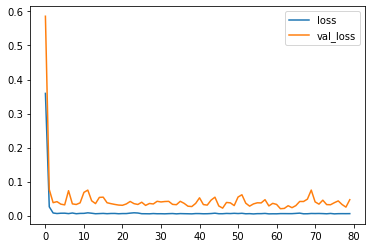

In [10]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(1249, 1)


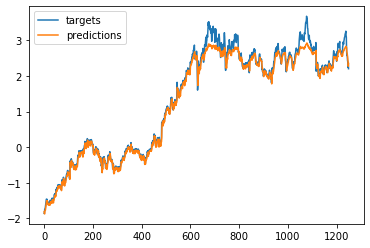

In [11]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

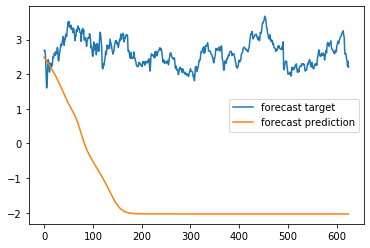

In [12]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [13]:
# calculate returns by first shifting the data
df['PrevClose'] = df['close'].shift(1) # move everything up 1

# so now it's like
# close / prev close
# x[2] x[1]
# x[3] x[2]
# x[4] x[3]
# ...
# x[t] x[t-1]

In [14]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [15]:
# then the return is
# (x[t] - x[t-1]) / x[t-1]
df['Return'] = (df['close'] - df['PrevClose']) / df['PrevClose']

In [16]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


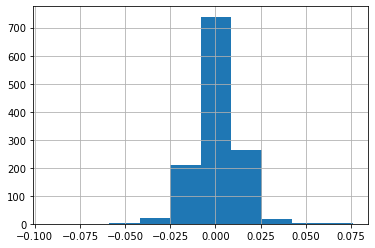

In [17]:
# Now let's try an LSTM to predict returns
df['Return'].hist()

In [18]:
series = df['Return'].values[1:].reshape(-1, 1)

# Normalize the data
# Note: I didn't think about where the true boundary is, this is just approx.
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

In [19]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (1248, 10, 1) Y.shape (1248,)


In [20]:
### try autoregressive RNN model
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.01),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Train on 624 samples, validate on 624 samples
Epoch 1/80
624/624 [==============================] - 4s 6ms/sample - loss: 1.0023 - val_loss: 1.1293
Epoch 2/80
624/624 [==============================] - 0s 625us/sample - loss: 0.9904 - val_loss: 1.1458
Epoch 3/80
624/624 [==============================] - 0s 498us/sample - loss: 0.9861 - val_loss: 1.1403
Epoch 4/80
624/624 [==============================] - 0s 519us/sample - loss: 0.9914 - val_loss: 1.1320
Epoch 5/80
624/624 [==============================] - 0s 713us/sample - loss: 0.9897 - val_loss: 1.1510
Epoch 6/80
624/624 [==============================] - 0s 651us/sample - loss: 0.9835 - val_loss: 1.1389
Epoch 7/80
624/624 [==============================] - 0s 687us/sample - loss: 0.9842 - val_loss: 1.1447
Epoch 8/80
624/624 [==============================] - 0s 649us/sample - loss: 0.9825 - val_loss: 1.1477
Epoch 9/80
624/624 [==============================] - 0s 630us/sample - loss: 0.9826 - val_loss: 1.1513
Epoch 10/80
624/624 

624/624 [==============================] - 0s 686us/sample - loss: 0.7741 - val_loss: 1.4919
Epoch 79/80
624/624 [==============================] - 1s 839us/sample - loss: 0.7787 - val_loss: 1.4566
Epoch 80/80
624/624 [==============================] - 0s 620us/sample - loss: 0.7654 - val_loss: 1.5035


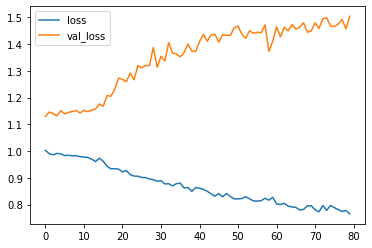

In [21]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(1248, 1)


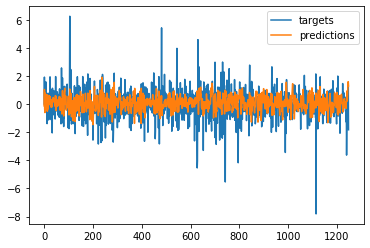

In [22]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

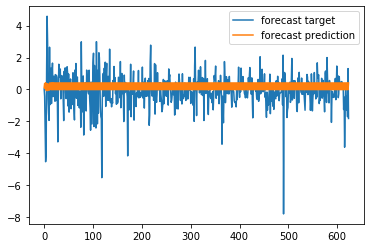

In [23]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [24]:
# Now turn the full data into numpy arrays

# Not yet in the final "X" format!
input_data = df[['open', 'high', 'low', 'close', 'volume']].values
targets = df['Return'].values

In [25]:
# Now make the actual data which will go into the neural network
T = 10 # the number of time steps to look at to make a prediction for the next day
D = input_data.shape[1]
N = len(input_data) - T # (e.g. if T=10 and you have 11 data points then you'd only have 1 sample)

In [26]:
# normalize the inputs
Ntrain = len(input_data) * 2 // 3
scaler = StandardScaler()
scaler.fit(input_data[:Ntrain + T - 1])
input_data = scaler.transform(input_data)

In [27]:
# Setup X_train and Y_train
X_train = np.zeros((Ntrain, T, D))
Y_train = np.zeros(Ntrain)

for t in range(Ntrain):
  X_train[t, :, :] = input_data[t:t+T]
  Y_train[t] = (targets[t+T] > 0)

In [28]:
# Setup X_test and Y_test
X_test = np.zeros((N - Ntrain, T, D))
Y_test = np.zeros(N - Ntrain)

for u in range(N - Ntrain):
  # u counts from 0...(N - Ntrain)
  # t counts from Ntrain...N
  t = u + Ntrain
  X_test[u, :, :] = input_data[t:t+T]
  Y_test[u] = (targets[t+T] > 0)

In [29]:
# make the RNN
i = Input(shape=(T, D))
x = LSTM(50)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.001),
  metrics=['accuracy'],
)

In [30]:
# train the RNN
r = model.fit(
  X_train, Y_train,
  batch_size=32,
  epochs=300,
  validation_data=(X_test, Y_test),
)

Train on 839 samples, validate on 410 samples
Epoch 1/300
839/839 [==============================] - 5s 6ms/sample - loss: 0.6950 - accuracy: 0.5113 - val_loss: 0.6927 - val_accuracy: 0.4878
Epoch 2/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.6947 - accuracy: 0.5232 - val_loss: 0.6926 - val_accuracy: 0.4951
Epoch 3/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.6928 - accuracy: 0.5054 - val_loss: 0.6914 - val_accuracy: 0.5317
Epoch 4/300
839/839 [==============================] - 1s 784us/sample - loss: 0.6912 - accuracy: 0.5197 - val_loss: 0.6948 - val_accuracy: 0.4927
Epoch 5/300
839/839 [==============================] - 1s 918us/sample - loss: 0.6908 - accuracy: 0.5280 - val_loss: 0.6943 - val_accuracy: 0.4878
Epoch 6/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.6916 - accuracy: 0.5209 - val_loss: 0.6951 - val_accuracy: 0.4927
Epoch 7/300
839/839 [==============================] - 1s 985us/sample - loss: 0

839/839 [==============================] - 1s 1ms/sample - loss: 0.6679 - accuracy: 0.5650 - val_loss: 0.6998 - val_accuracy: 0.5171
Epoch 57/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.6670 - accuracy: 0.5793 - val_loss: 0.7024 - val_accuracy: 0.5171
Epoch 58/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.6665 - accuracy: 0.5781 - val_loss: 0.7122 - val_accuracy: 0.4951
Epoch 59/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.6672 - accuracy: 0.5733 - val_loss: 0.7065 - val_accuracy: 0.5122
Epoch 60/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.6680 - accuracy: 0.5805 - val_loss: 0.7120 - val_accuracy: 0.4902
Epoch 61/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.6617 - accuracy: 0.5840 - val_loss: 0.7032 - val_accuracy: 0.5146
Epoch 62/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.6614 - accuracy: 0.5912 - val_loss: 0.7029 - val_accuracy

839/839 [==============================] - 1s 1ms/sample - loss: 0.5815 - accuracy: 0.6579 - val_loss: 0.7642 - val_accuracy: 0.4878
Epoch 113/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.5768 - accuracy: 0.6782 - val_loss: 0.7833 - val_accuracy: 0.4829
Epoch 114/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.5799 - accuracy: 0.6663 - val_loss: 0.7922 - val_accuracy: 0.4902
Epoch 115/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.5746 - accuracy: 0.6913 - val_loss: 0.7818 - val_accuracy: 0.4854
Epoch 116/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.5773 - accuracy: 0.6806 - val_loss: 0.8044 - val_accuracy: 0.4634
Epoch 117/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.5771 - accuracy: 0.6782 - val_loss: 0.7992 - val_accuracy: 0.4902
Epoch 118/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.5682 - accuracy: 0.6877 - val_loss: 0.7752 - val_ac

Epoch 168/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.4519 - accuracy: 0.7712 - val_loss: 0.9404 - val_accuracy: 0.4878
Epoch 169/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.4508 - accuracy: 0.7843 - val_loss: 0.9387 - val_accuracy: 0.4927
Epoch 170/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.4517 - accuracy: 0.7759 - val_loss: 0.9490 - val_accuracy: 0.4854
Epoch 171/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.4503 - accuracy: 0.7843 - val_loss: 0.9677 - val_accuracy: 0.5024
Epoch 172/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.4608 - accuracy: 0.7652 - val_loss: 0.9270 - val_accuracy: 0.4878
Epoch 173/300
839/839 [==============================] - 1s 992us/sample - loss: 0.4562 - accuracy: 0.7747 - val_loss: 0.9869 - val_accuracy: 0.4805
Epoch 174/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.4433 - accuracy: 0.7914 - val_loss:

839/839 [==============================] - 1s 1ms/sample - loss: 0.3260 - accuracy: 0.8486 - val_loss: 1.1676 - val_accuracy: 0.4683
Epoch 224/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.3197 - accuracy: 0.8629 - val_loss: 1.1669 - val_accuracy: 0.4951
Epoch 225/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.3171 - accuracy: 0.8617 - val_loss: 1.1594 - val_accuracy: 0.4902
Epoch 226/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.3198 - accuracy: 0.8558 - val_loss: 1.2246 - val_accuracy: 0.4878
Epoch 227/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.3107 - accuracy: 0.8605 - val_loss: 1.2068 - val_accuracy: 0.4829
Epoch 228/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.3162 - accuracy: 0.8546 - val_loss: 1.2083 - val_accuracy: 0.5000
Epoch 229/300
839/839 [==============================] - 1s 2ms/sample - loss: 0.3248 - accuracy: 0.8570 - val_loss: 1.2464 - val_ac

Epoch 279/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.3089 - accuracy: 0.8629 - val_loss: 1.4330 - val_accuracy: 0.4878
Epoch 280/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.2505 - accuracy: 0.8951 - val_loss: 1.6002 - val_accuracy: 0.4732
Epoch 281/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.2266 - accuracy: 0.9035 - val_loss: 1.4632 - val_accuracy: 0.4927
Epoch 282/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.2160 - accuracy: 0.9130 - val_loss: 1.5296 - val_accuracy: 0.4707
Epoch 283/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.2094 - accuracy: 0.9082 - val_loss: 1.5335 - val_accuracy: 0.5000
Epoch 284/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.2033 - accuracy: 0.9154 - val_loss: 1.5699 - val_accuracy: 0.4902
Epoch 285/300
839/839 [==============================] - 1s 1ms/sample - loss: 0.2019 - accuracy: 0.9201 - val_loss: 1

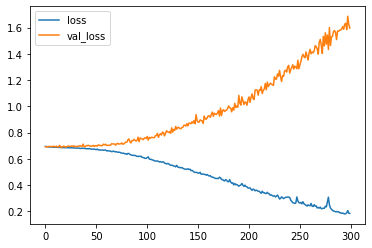

In [31]:
# plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

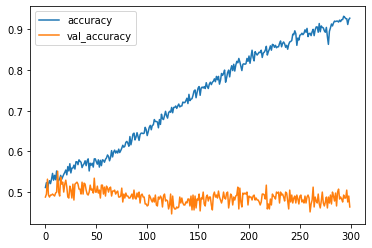

In [32]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()